# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

plt.style.use("ggplot")

# Reading the data into a dataframe

In [17]:
df = pd.read_csv('users_data.csv')

In [7]:
df.head()

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score,cluster
0,146245,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
1,248802,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,NaN
2,13873,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,NaN
3,35230,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
4,653322,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN


# Checking the Data quality

In [189]:
df.nunique()

user_id          1599
loan_score         96
device_rating     143
data_quality       80
ltv_rate           91
bureau_score      153
total_tenure       60
months_active     144
savings_score     436
tx_score           89
usage_score        96
airtime_score      65
dtype: int64

In [9]:
df.shape

(1599, 13)

In [49]:
df.columns.tolist()

['user_id',
 'loan_score',
 'device_rating',
 'data_quality',
 'ltv_rate',
 'bureau_score',
 'total_tenure',
 'months_active',
 'savings_score',
 'tx_score',
 'usage_score',
 'airtime_score']

In [19]:
# dropping the null column
df = df.drop('cluster', axis=1)

In [21]:
df.shape

(1599, 12)

In [23]:
# checking for the null values
df.isna().sum()

user_id          0
loan_score       0
device_rating    0
data_quality     0
ltv_rate         0
bureau_score     0
total_tenure     0
months_active    0
savings_score    0
tx_score         0
usage_score      0
airtime_score    0
dtype: int64

In [25]:
# Check for duplicated data
df.duplicated().sum()

0

In [27]:
# checking data types
df.dtypes

user_id            int64
loan_score       float64
device_rating    float64
data_quality     float64
ltv_rate         float64
bureau_score     float64
total_tenure     float64
months_active    float64
savings_score    float64
tx_score         float64
usage_score      float64
airtime_score    float64
dtype: object

In [29]:
df.describe()

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,397669.085679,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,228348.459331,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,1449.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,196569.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,398366.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,592184.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,798882.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Analyzing the feature correlation and Outlier Detection

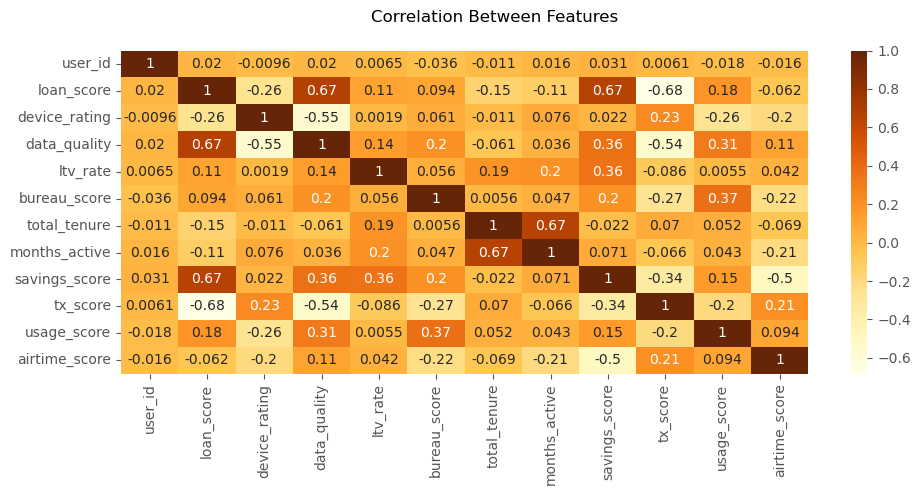

In [31]:
# Check correlation between features
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
plt.suptitle(f"Correlation Between Features")
plt.tight_layout()
plt.show()

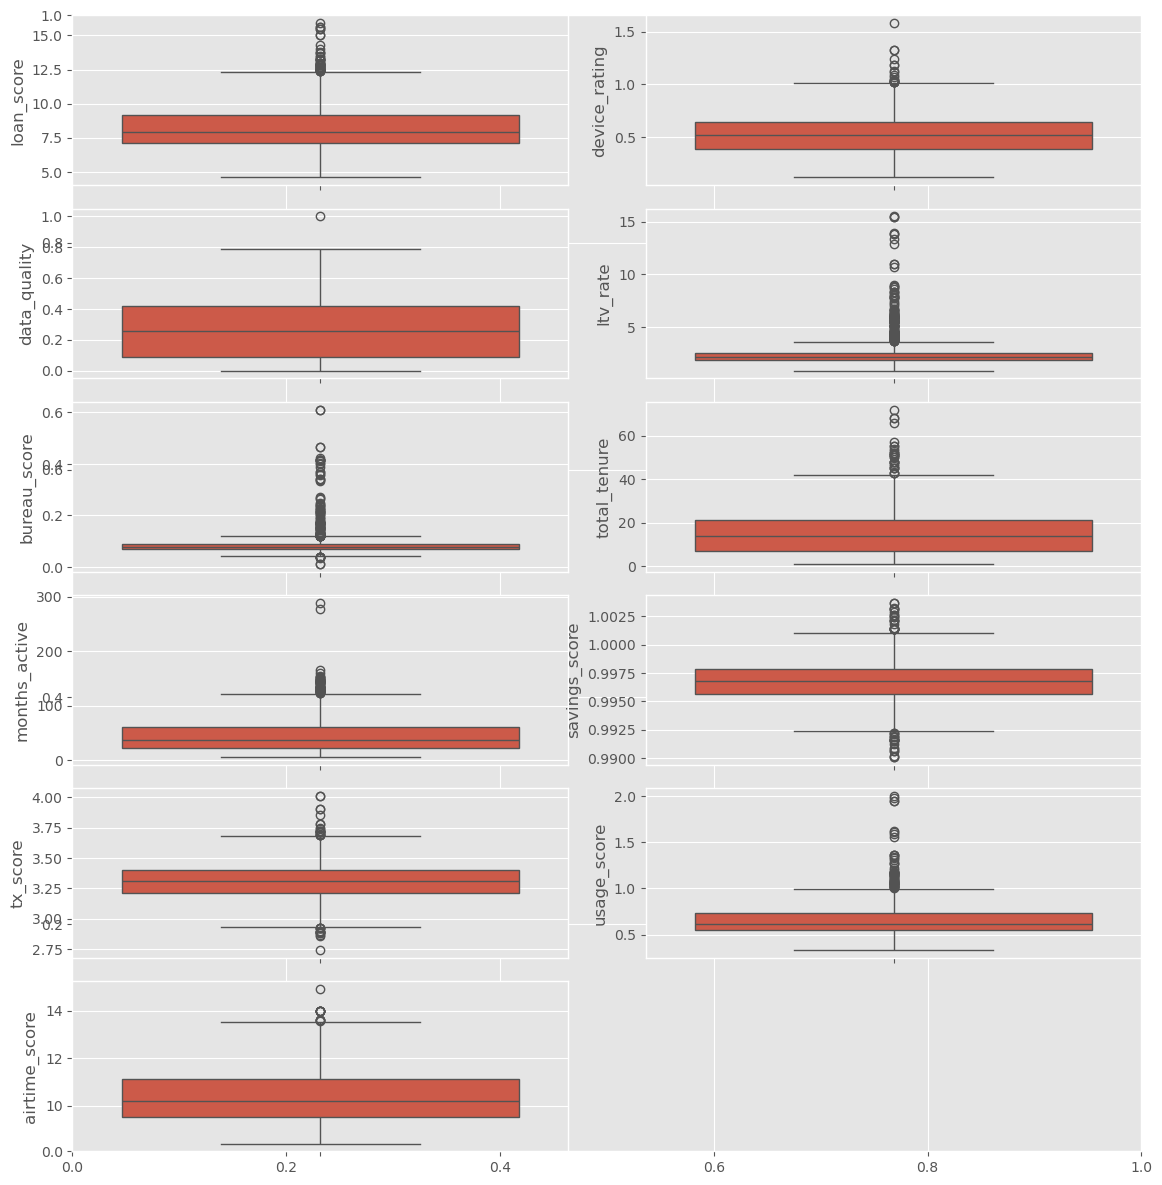

In [33]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df.drop('user_id', axis=1).columns):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

In [65]:
df2 = df.iloc[:,:]

def outliers_for_features(df, col):
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)

    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)

    return df2[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

for col in ['months_active','loan_score','device_rating','data_quality','ltv_rate','bureau_score','total_tenure','months_active','usage_score']:
    df2[col] = outliers_for_features(df, col)

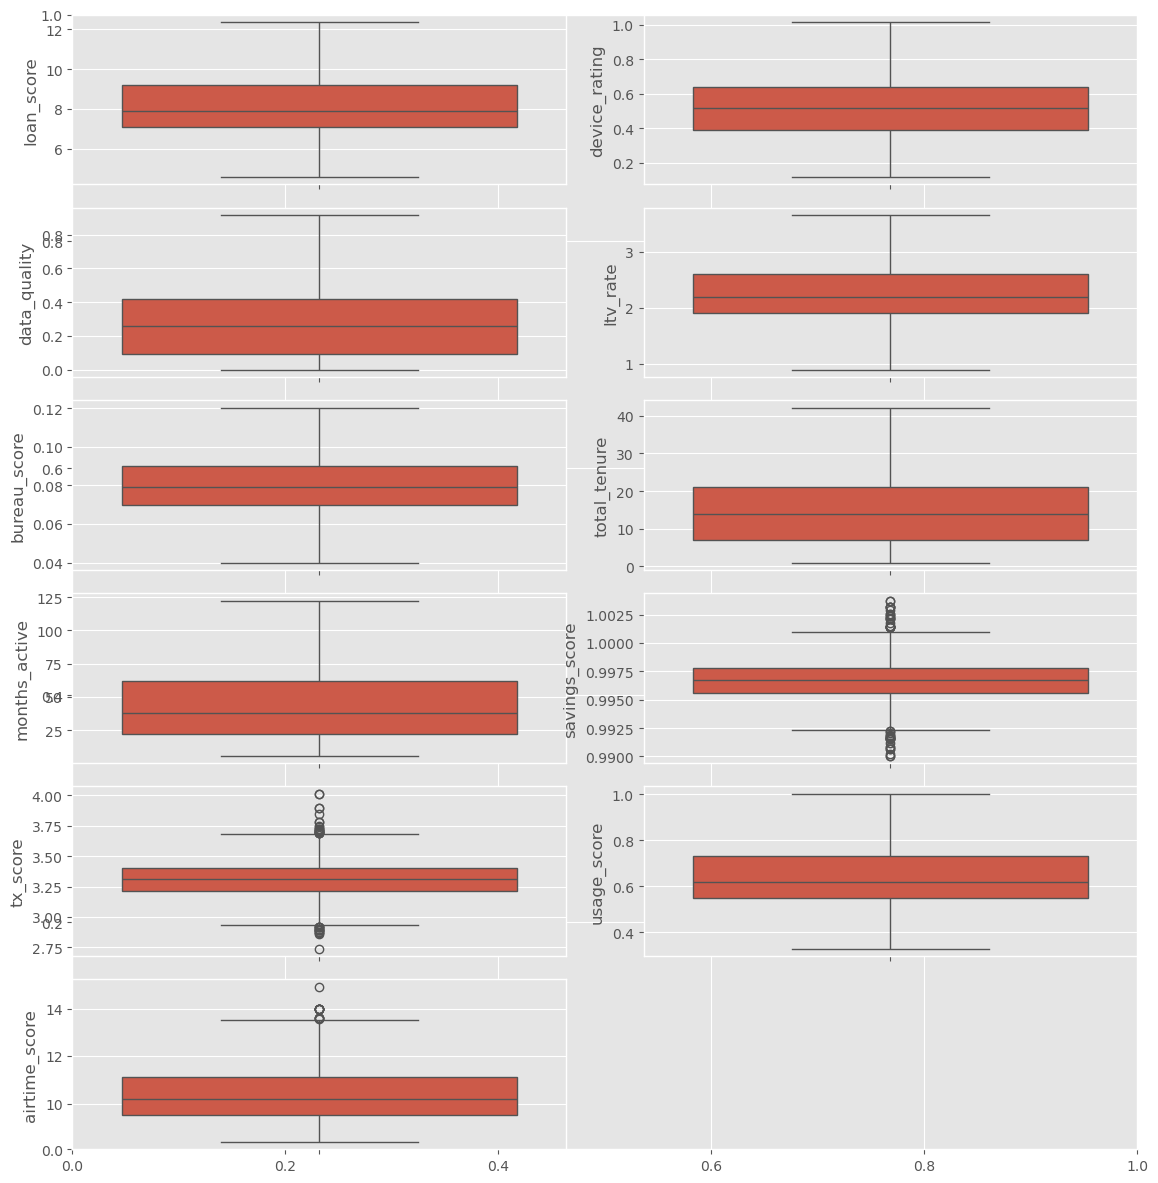

In [67]:
# Checking the distribution after flooring and capping

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df2.drop('user_id', axis=1).columns):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(df2[feature])
    plt.tight_layout()

In [69]:
df2.head()

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score
0,146245,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,248802,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,13873,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,35230,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,653322,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [71]:
df2.shape

(1599, 12)

# Checking Suitability of dataset for clustering, Hopkins test

In [74]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [76]:
hopkins(df.drop('user_id', axis = 1))

0.9499345840650413

In [78]:
hopkins(df2.drop('user_id', axis = 1))

0.8482558193051448

# The hopkins test shows that there's  no need for the flooring and capping technique on the data, as the original data is well within range and there are no unnecessary outliers. so we use the data without the flooring and capping technique (df).

In [83]:
df.head()

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score
0,146245,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,248802,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,13873,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,35230,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,653322,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Scaling the data

In [166]:
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df.iloc[:, 1:])

# Clustering

# Kmeans

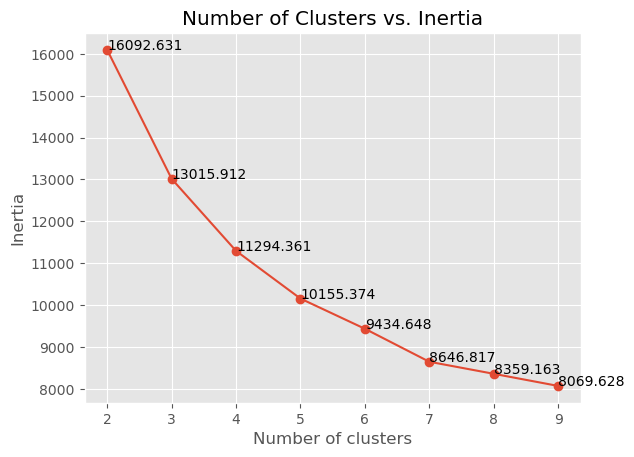

In [170]:
#Choosing k-value for K means algorithm
ssd = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters = n, max_iter = 50, random_state=101).fit(df_scaled)
    ssd.append(km.inertia_)

plt.plot(num_of_clusters, ssd, marker='o')

for xy in zip(num_of_clusters, ssd):
    plt.annotate(text = round(xy[1],3), xy = xy,  textcoords='data')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()

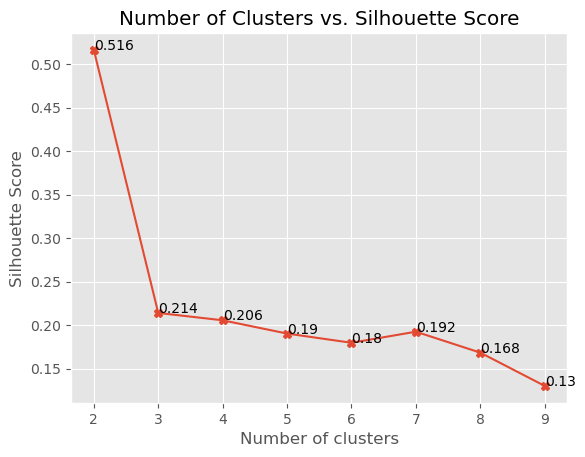

In [91]:
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(df_scaled)
    silhouette_value.append(silhouette_score(df_scaled, km.labels_))

plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):
    plt.annotate(text = round(xy[1],3), xy = xy,  textcoords='data')

plt.show()

In [172]:
# Building K Means model with 4 clusters
km = KMeans(n_clusters=4, max_iter=100 , random_state = 101)
km.fit(df_scaled)

KMeans(max_iter=100, n_clusters=4, random_state=101)

In [174]:
print(km.labels_)
print(km.labels_.shape)

[0 3 0 ... 0 0 0]
(1599,)


# Hierarchical

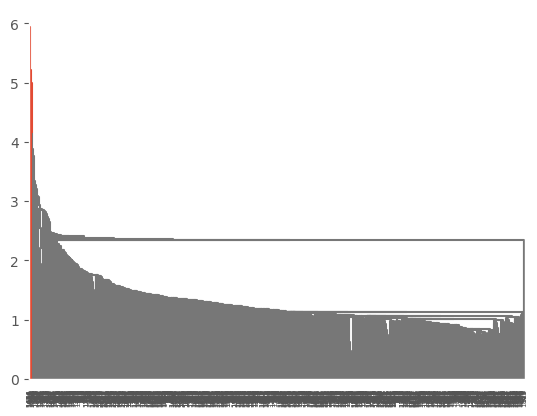

In [93]:
mergings_single = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

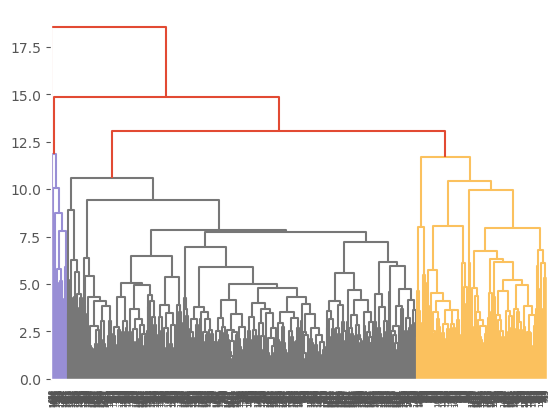

In [95]:
mergings_complete = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

# Given that the Hierarchical clustering method showed only three visible clusters in the dendrogram, increasing the number of clusters to four will introduce inaccuracies and complicate interpretability. Therefore, we will use KMeans clustering to create the clusters, as it allows us to create up to four clusters more flexibly and still maintain meaningful segmentation without causing interpretability issues.

In [177]:
df_clust = df.iloc[:,:]
df_clust = pd.concat([df_clust, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
df_clust.head()

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score,cluster_id_km
0,146245,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,248802,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,13873,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,35230,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,653322,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [179]:
print(df_clust['cluster_id_km'].value_counts())

cluster_id_km
0    714
2    478
3    379
1     28
Name: count, dtype: int64


In [181]:
# Kmeans analysis
df_km = df_clust.groupby('cluster_id_km').mean()

In [183]:
df_km

,user_id,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score
cluster_id_km,,,,,,,,,,,,
0,388252.705882,7.190896,0.614041,0.118627,2.217157,0.079084,13.425070,34.803922,0.995919,3.405462,0.608431,10.476891
1,324955.607143,8.485714,0.528214,0.501071,1.989286,0.359643,15.357143,63.250000,0.997086,3.043214,1.278929,9.496429
2,407652.020921,10.119665,0.394498,0.469226,2.610356,0.084366,10.648536,28.847280,0.997545,3.206025,0.719414,10.818968
3,408190.007916,8.163588,0.533509,0.290950,3.095119,0.087061,27.120053,89.424802,0.997274,3.285699,0.628681,9.890457


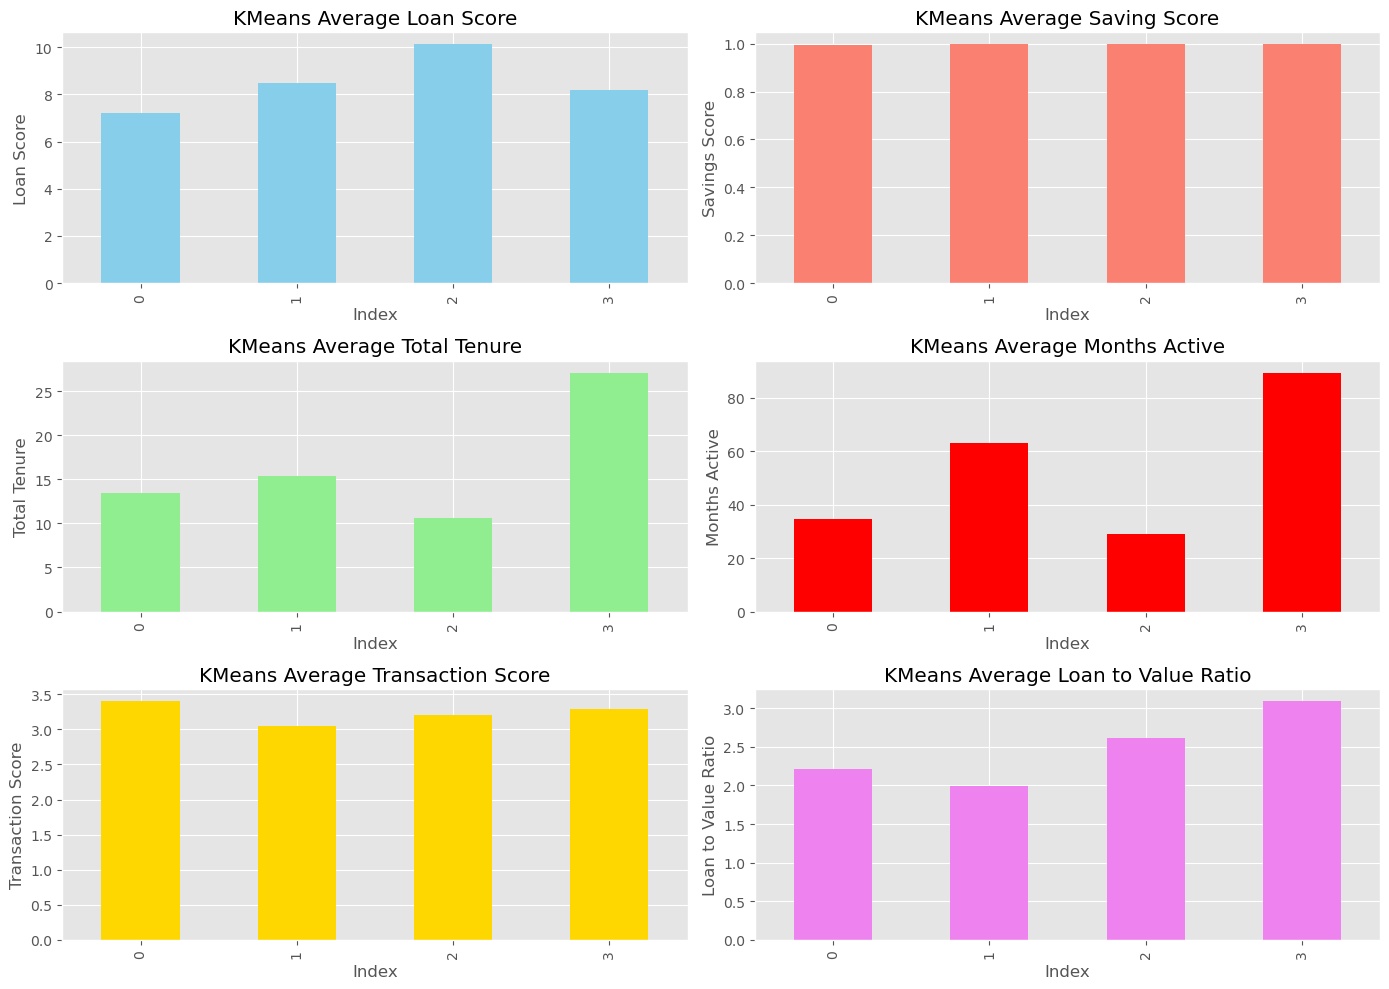

In [160]:
fig = plt.figure(figsize=(14, 10))

# Subplot 1: KMeans Average Loan Score
ax1 = fig.add_subplot(3, 2, 1, title="KMeans Average Loan Score")
df_km['loan_score'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel('Index')
ax1.set_ylabel('Loan Score')

# Subplot 2: KMeans Average Saving Score
ax2 = fig.add_subplot(3, 2, 2, title="KMeans Average Saving Score")
df_km['savings_score'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_xlabel('Index')
ax2.set_ylabel('Savings Score')

# Subplot 3: KMeans Average Total Tenure
ax3 = fig.add_subplot(3, 2, 3, title="KMeans Average Total Tenure")
df_km['total_tenure'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_xlabel('Index')
ax3.set_ylabel('Total Tenure')

# Subplot 4: KMeans Average Months Active
ax4 = fig.add_subplot(3, 2, 4, title="KMeans Average Months Active")
df_km['months_active'].plot(kind='bar', ax=ax4, color='red')
ax4.set_xlabel('Index')
ax4.set_ylabel('Months Active')

# Subplot 5: KMeans Average Transaction Score
ax5 = fig.add_subplot(3, 2, 5, title="KMeans Average Transaction Score")
df_km['tx_score'].plot(kind='bar', ax=ax5, color='gold')
ax5.set_xlabel('Index')
ax5.set_ylabel('Transaction Score')

# Subplot 6: KMeans Average Loan to Value Ratio
ax6 = fig.add_subplot(3, 2, 6, title="KMeans Average Loan to Value Ratio")
df_km['ltv_rate'].plot(kind='bar', ax=ax6, color='violet')
ax6.set_xlabel('Index')
ax6.set_ylabel("Loan to Value Ratio")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()
